In [1]:
# Import dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import torch

In [2]:
# Set parameters for ylabels

def plot_decompose(decompose_result):
    fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize=(12,20))
    decompose_result.observed.plot(legend=False,ax=ax1,fontsize = 20,grid=True,linewidth = 3)
    ax1.set_ylabel("Observed",fontsize = 20)
    decompose_result.trend.plot(legend=False,ax=ax2,fontsize = 20,grid=True,linewidth = 3)
    ax2.set_ylabel("Trend",fontsize = 20)
    decompose_result.seasonal.plot(legend=False,ax=ax3,fontsize = 20,grid=True,linewidth = 3)
    ax3.set_ylabel("Seasonal",fontsize = 20)
    decompose_result.resid.plot(legend=False,ax=ax4,fontsize = 20,grid=True,linewidth = 3)
    ax4.set_ylabel("Residual",fontsize = 20)

### EDA

In [7]:
# Set background gradient based on passengers

flight_df = pd.read_csv('flight.csv')
cm = sns.light_palette("green", as_cmap=True)
flight_df.head(20).style.background_gradient(cmap=cm)

In [8]:
# Passengers stats

print(flight_df.describe())
print('-'*40)
print(flight_df.tail())

              year  passengers
count   144.000000  144.000000
mean   1954.500000  280.298611
std       3.464102  119.966317
min    1949.000000  104.000000
25%    1951.750000  180.000000
50%    1954.500000  265.500000
75%    1957.250000  360.500000
max    1960.000000  622.000000
----------------------------------------
     year      month  passengers
139  1960     August         606
140  1960  September         508
141  1960    October         461
142  1960   November         390
143  1960   December         432


In [6]:
flight_df.shape

(144, 2)

In [10]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   year        144 non-null    int64 
 1   month       144 non-null    object
 2   passengers  144 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 3.5+ KB


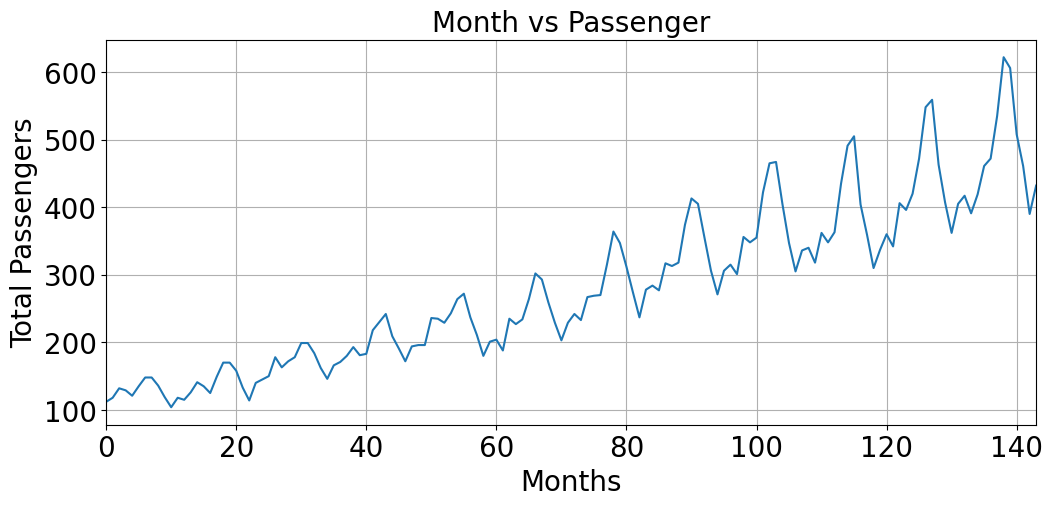

In [12]:
# Plot month vs passenger

plt.figure(figsize=(12,5))
plt.title('Month vs Passenger',fontsize = 20)
plt.ylabel('Total Passengers',fontsize = 20)
plt.xlabel('Months',fontsize = 20)
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.plot(flight_df['passengers'])

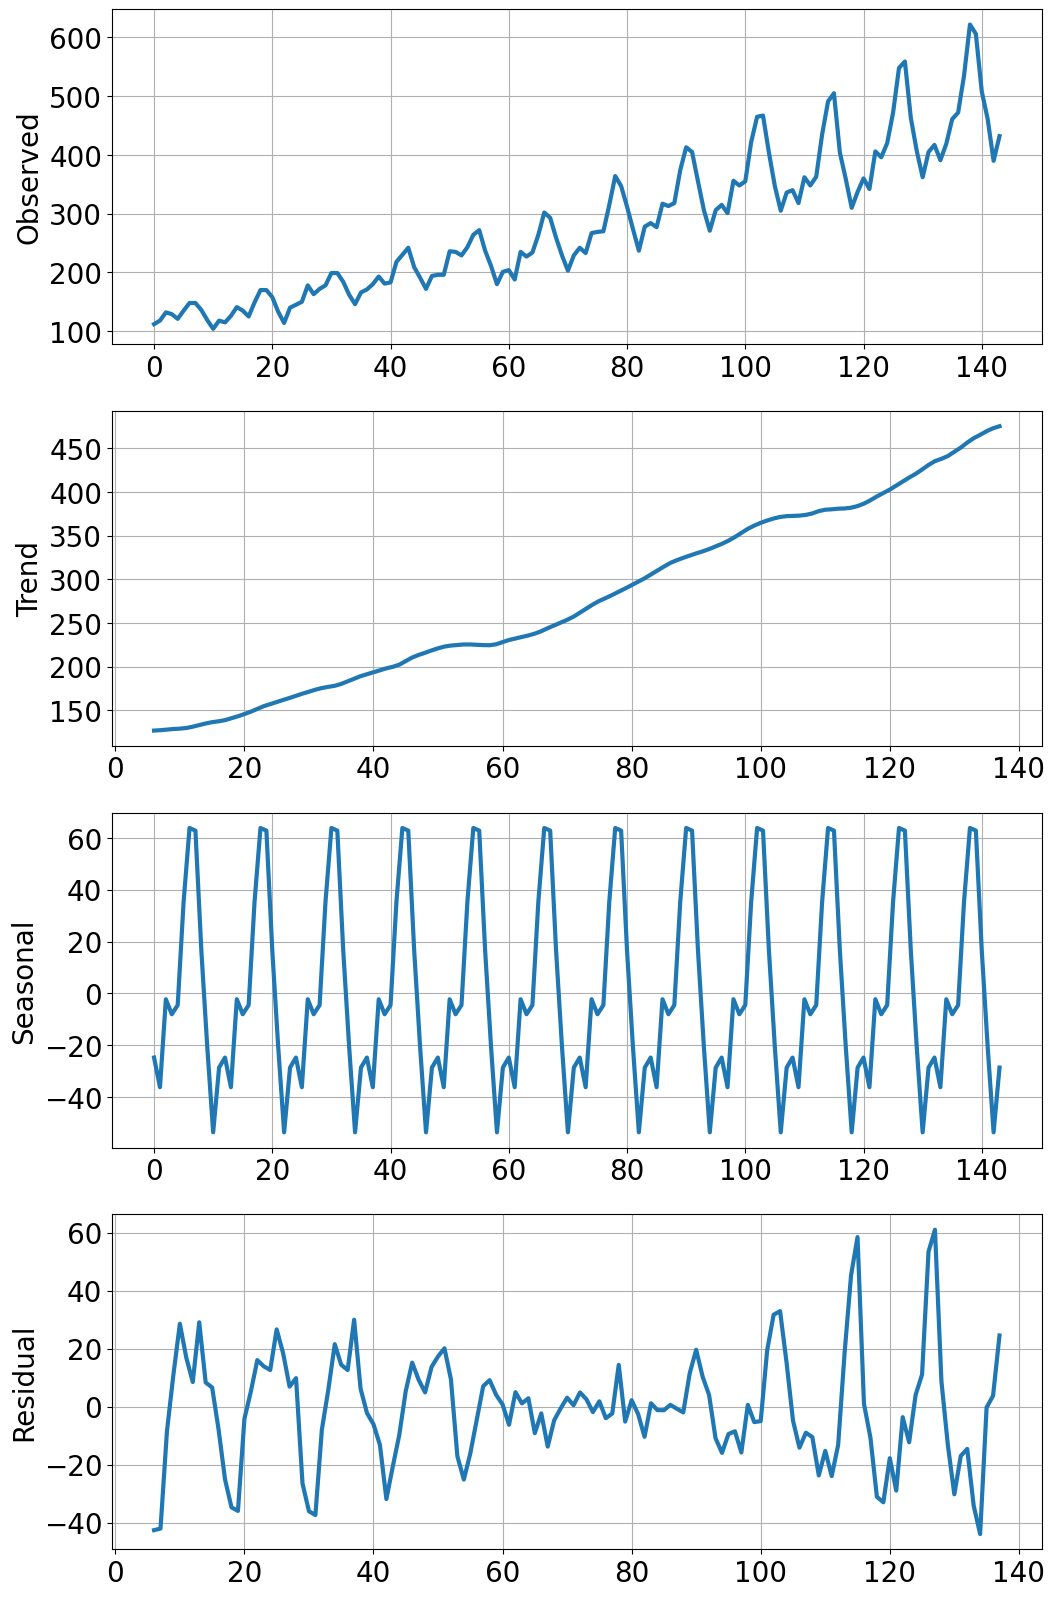

In [14]:
# Decompose time series data into trend, seasonality, and residual

import statsmodels
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(flight_df['passengers'], period=12) 
plot_decompose(decomposition)

### Data Prep

In [15]:
# Convert passengers column to float data type

all_data = flight_df['passengers'].values.astype(float)
print(all_data)

[112. 118. 132. 129. 121. 135. 148. 148. 136. 119. 104. 118. 115. 126.
 141. 135. 125. 149. 170. 170. 158. 133. 114. 140. 145. 150. 178. 163.
 172. 178. 199. 199. 184. 162. 146. 166. 171. 180. 193. 181. 183. 218.
 230. 242. 209. 191. 172. 194. 196. 196. 236. 235. 229. 243. 264. 272.
 237. 211. 180. 201. 204. 188. 235. 227. 234. 264. 302. 293. 259. 229.
 203. 229. 242. 233. 267. 269. 270. 315. 364. 347. 312. 274. 237. 278.
 284. 277. 317. 313. 318. 374. 413. 405. 355. 306. 271. 306. 315. 301.
 356. 348. 355. 422. 465. 467. 404. 347. 305. 336. 340. 318. 362. 348.
 363. 435. 491. 505. 404. 359. 310. 337. 360. 342. 406. 396. 420. 472.
 548. 559. 463. 407. 362. 405. 417. 391. 419. 461. 472. 535. 622. 606.
 508. 461. 390. 432.]


In [21]:
# Create train/test split

test_data_size = 12

train_data = all_data[:-test_data_size]
test_data = all_data[-test_data_size:]

print(f"Train Data: {len(train_data)}")
print(f"Test Data: {len(test_data)}")

Train Data: 132
Test Data: 12


In [22]:
# Perform min-max scaling

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
train_data_normalized = scaler.fit_transform(train_data .reshape(-1, 1))

In [23]:
# Normalize train data

train_data_normalized = torch.FloatTensor(train_data_normalized).view(-1)

In [24]:
# Create in-out sequences function 

train_window = 12

def create_inout_sequences(input_data, window):
    inout_seq = []
    L = len(input_data)
    for i in range(L-window):
        train_seq = input_data[i:i+window]
        train_label = input_data[i+window:i+window+1]
        inout_seq.append((train_seq ,train_label))
    return inout_seq

In [25]:
# Run function

train_inout_seq = create_inout_sequences(train_data_normalized, train_window)

In [26]:
# View results 

train_inout_seq[:5]

[(tensor([-0.9648, -0.9385, -0.8769, -0.8901, -0.9253, -0.8637, -0.8066, -0.8066,
          -0.8593, -0.9341, -1.0000, -0.9385]),
  tensor([-0.9516])),
 (tensor([-0.9385, -0.8769, -0.8901, -0.9253, -0.8637, -0.8066, -0.8066, -0.8593,
          -0.9341, -1.0000, -0.9385, -0.9516]),
  tensor([-0.9033])),
 (tensor([-0.8769, -0.8901, -0.9253, -0.8637, -0.8066, -0.8066, -0.8593, -0.9341,
          -1.0000, -0.9385, -0.9516, -0.9033]),
  tensor([-0.8374])),
 (tensor([-0.8901, -0.9253, -0.8637, -0.8066, -0.8066, -0.8593, -0.9341, -1.0000,
          -0.9385, -0.9516, -0.9033, -0.8374]),
  tensor([-0.8637])),
 (tensor([-0.9253, -0.8637, -0.8066, -0.8066, -0.8593, -0.9341, -1.0000, -0.9385,
          -0.9516, -0.9033, -0.8374, -0.8637]),
  tensor([-0.9077]))]

### LSTM: Modeling

In [27]:
import numpy as np
import torch
from torch import nn
import torch.nn.functional as F

In [28]:
# LSTM functions

class LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=128, num_layers=2, output_size=1):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size
        self.lstm = nn.LSTM(input_size, hidden_layer_size, num_layers=num_layers)
        self.linear = nn.Linear(hidden_layer_size, output_size)

    def forward(self, input_seq):
        lstm_out, _ = self.lstm(input_seq.view(len(input_seq) ,1, -1))
        predictions = self.linear(lstm_out[:,-1,:])
        return predictions[-1]

In [30]:
# Run LSTM components

model = LSTM()
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

print(model)

LSTM(
  (lstm): LSTM(1, 128, num_layers=2)
  (linear): Linear(in_features=128, out_features=1, bias=True)
)


### LSTM: Training

In [31]:
# Run model against 500 epochs

epochs = 500

for i in range(epochs):
    for seq, labels in train_inout_seq:
        optimizer.zero_grad()
 
        y_pred = model(seq)

        single_loss = loss_function(y_pred, labels)
        single_loss.backward()
        optimizer.step()

    if i%25 == 1:
        print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')
print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

epoch:   1 loss: 0.02034098
epoch:  26 loss: 0.27775887
epoch:  51 loss: 0.04983975
epoch:  76 loss: 0.25768191
epoch: 101 loss: 0.27878147
epoch: 126 loss: 0.21911801
epoch: 151 loss: 0.11096575
epoch: 176 loss: 0.02188388
epoch: 201 loss: 0.03129062
epoch: 226 loss: 0.04682348
epoch: 251 loss: 0.04099477
epoch: 276 loss: 0.04247632
epoch: 301 loss: 0.03383408
epoch: 326 loss: 0.01852091
epoch: 351 loss: 0.00139137
epoch: 376 loss: 0.00361718
epoch: 401 loss: 0.00009184
epoch: 426 loss: 0.00012126
epoch: 451 loss: 0.00002237
epoch: 476 loss: 0.00047180
epoch: 499 loss: 0.00002641


### LSTM: Forecasting

In [32]:
# Make 12 future predictions

fut_pred = 12

test_inputs = train_data_normalized[-train_window:].tolist()
print(test_inputs)

[0.12527473270893097, 0.04615384712815285, 0.3274725377559662, 0.2835164964199066, 0.3890109956264496, 0.6175824403762817, 0.9516483545303345, 1.0, 0.5780220031738281, 0.33186814188957214, 0.13406594097614288, 0.32307693362236023]


In [33]:
# Evaluate model predictions

model.eval()

for i in range(fut_pred):
    seq = torch.FloatTensor(test_inputs[-train_window:])
    with torch.no_grad():
        test_inputs.append(model(seq).item())
        

# Check last 12 predictions
test_inputs[fut_pred:]

[0.4516333341598511,
 0.3375699520111084,
 0.5958799123764038,
 0.617106020450592,
 0.7524664402008057,
 1.0356826782226562,
 1.0917385816574097,
 1.097163438796997,
 1.0497745275497437,
 0.744495689868927,
 0.4589921236038208,
 0.637436032295227]

In [34]:
# Convert to real values

actual_predictions = scaler.inverse_transform(np.array(test_inputs[train_window:] ).reshape(-1, 1))
print(actual_predictions)

[[434.24658352]
 [408.29716408]
 [467.06268007]
 [471.89161965]
 [502.68611515]
 [567.1178093 ]
 [579.87052733]
 [581.10468233]
 [570.32370502]
 [500.87276945]
 [435.92070812]
 [476.51669735]]


In [36]:
x = np.arange(132, 144, 1)
print(x)

[132 133 134 135 136 137 138 139 140 141 142 143]


### LSTM: Evaluate

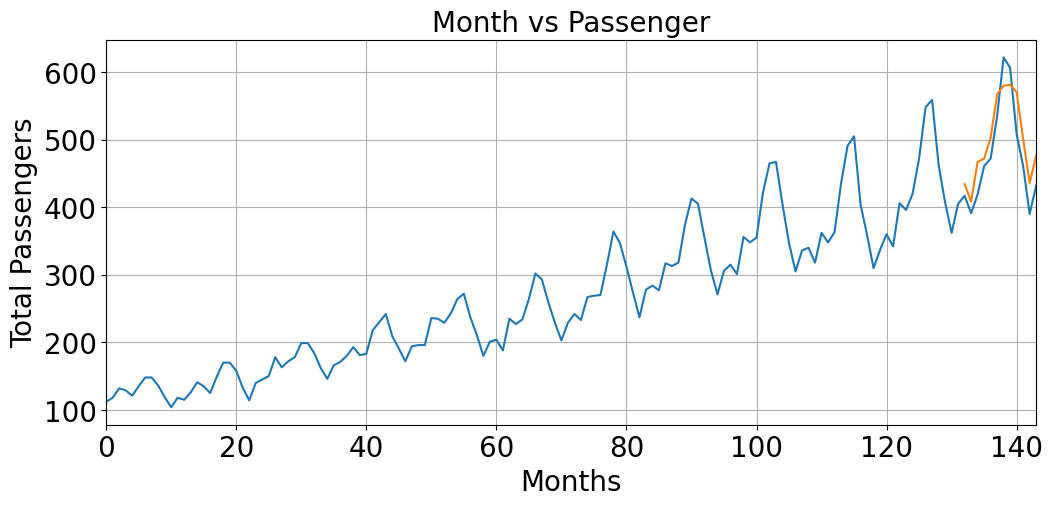

In [38]:
# Full plot

plt.figure(figsize=(12,5))
plt.title('Month vs Passenger',fontsize = 20)
plt.ylabel('Total Passengers',fontsize = 20)
plt.xlabel('Months',fontsize = 20)
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.plot(flight_df['passengers'])
plt.plot(x,actual_predictions)

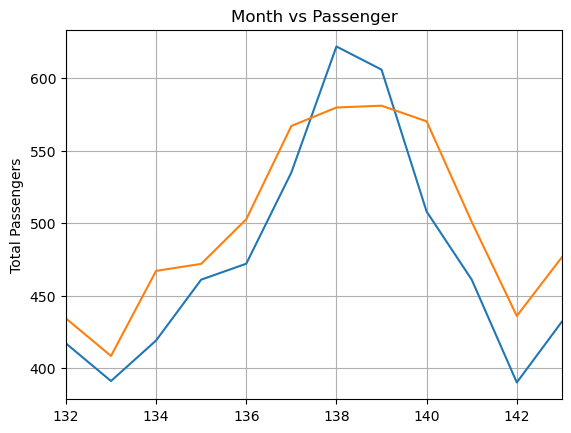

In [40]:
# Prediction window

plt.title('Month vs Passenger')
plt.ylabel('Total Passengers')
plt.grid(True)
plt.autoscale(axis='x', tight=True)

plt.plot(flight_df['passengers'][-train_window:])
plt.plot(x,actual_predictions)
plt.show()

In [41]:
# Check if predicted results are learned

flight_df['passengers'][:-train_window]
train_df = pd.DataFrame(flight_df['passengers'][:-train_window])
actual_df = pd.DataFrame(actual_predictions)
actual_df.columns = ['passengers']
new_predict = pd.concat([train_df,actual_df]).reset_index(drop=True)

In [45]:
# Plot results

plt.figure(figsize=(12,5))
plt.title('Month vs Passenger',fontsize = 20)
plt.ylabel('Total Passengers',fontsize = 20)
plt.xlabel('Months',fontsize = 20)
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.plot(new_predict)
plt.plot(flight_df['passengers'])

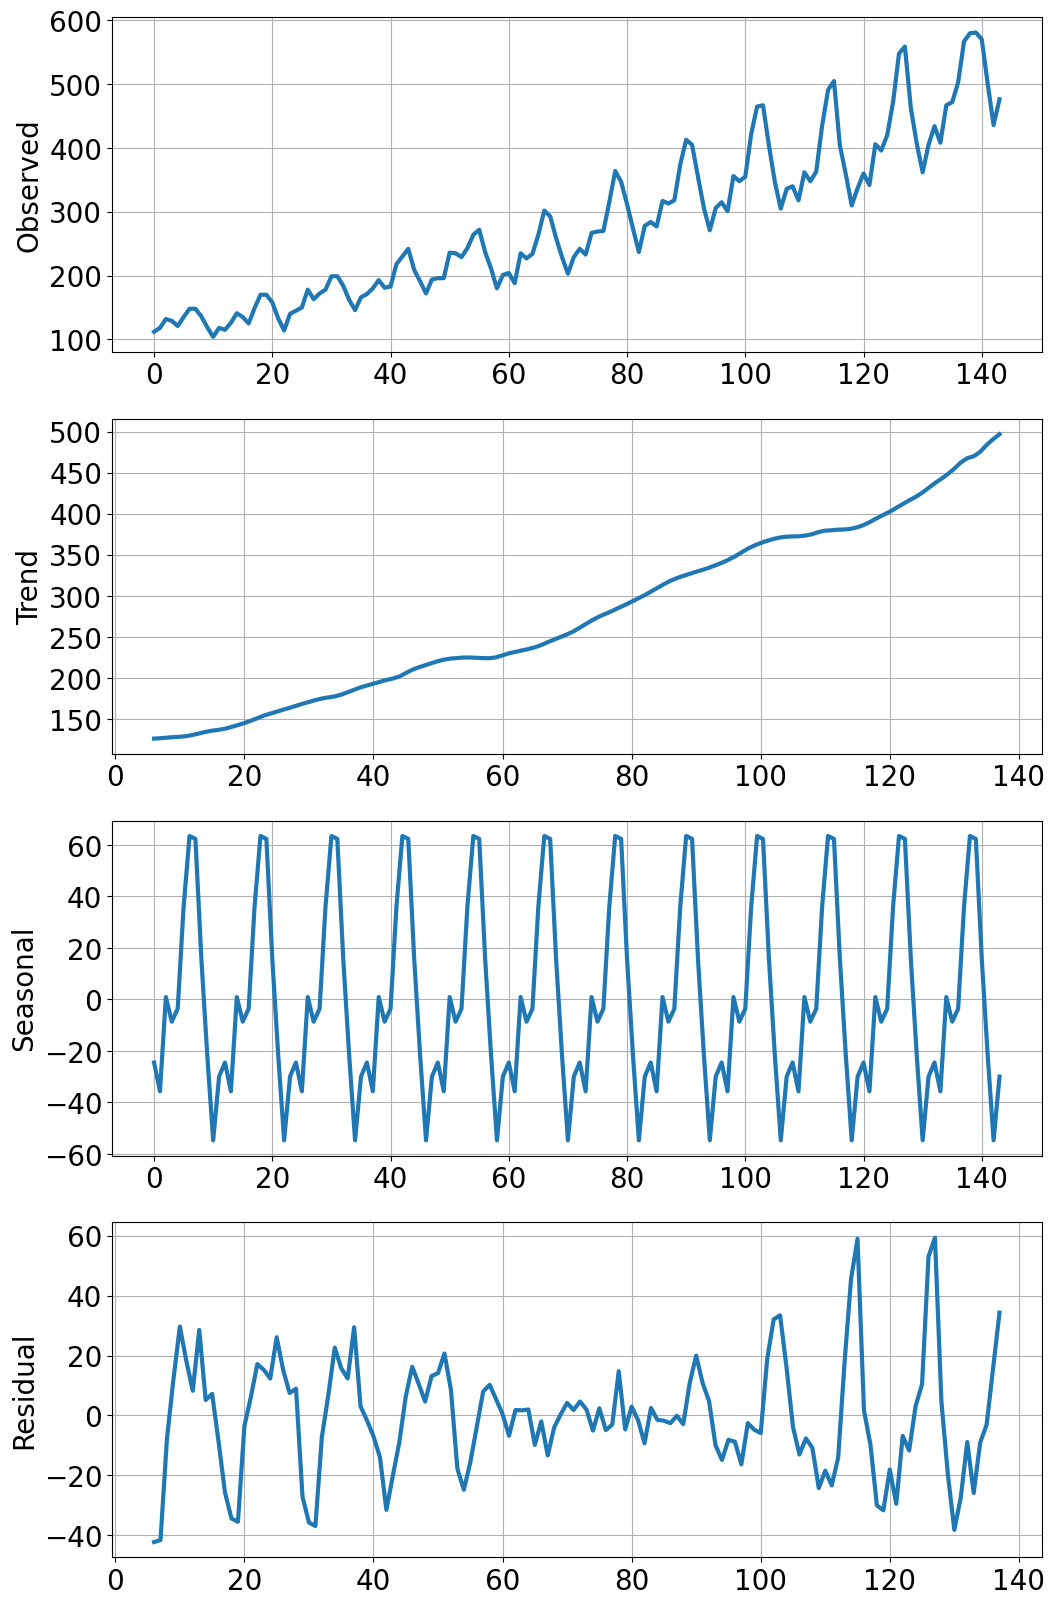

In [44]:
# Seasonal decomposition analysis

decomposition = seasonal_decompose(new_predict, period=12) 
plot_decompose(decomposition)

### Prophet: Preprocessing

In [47]:
df = flight_df.copy()

In [48]:
# Convert months to integers

month2int = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}
df['month'] = df['month'].map(month2int)

In [49]:
df['day'] = 1
df['ds'] = pd.to_datetime(df[['year','month','day']])
df_new = df.drop(columns=['year','month','day'])
df_new.rename(columns={"passengers": "y"},inplace=True)
df_new.head()

y         ds
0  112 1949-01-01
1  118 1949-02-01
2  132 1949-03-01
3  129 1949-04-01
4  121 1949-05-01

### Prophet: Training

In [52]:
from prophet import Prophet 
m = Prophet()
m.fit(df_new)

14:32:44 - cmdstanpy - INFO - Chain [1] start processing
14:32:44 - cmdstanpy - INFO - Chain [1] done processing


### Prophet: Predicting

In [53]:
future = m.make_future_dataframe(periods=500)
forecast = m.predict(future)

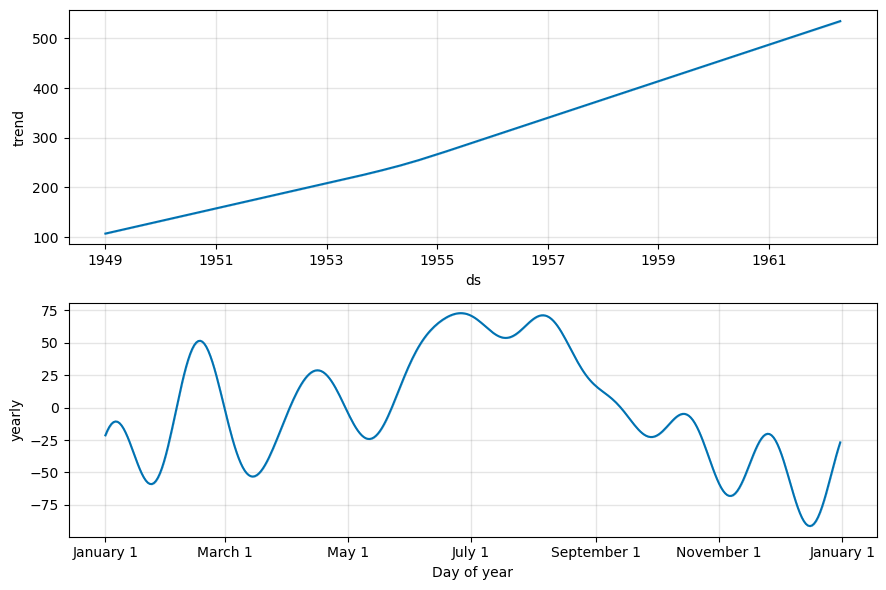

In [54]:
# Check results

fig2 = m.plot_components(forecast)

In [55]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [56]:
plot_components_plotly(m, forecast)

C:\Users\Eric\anaconda3\lib\site-packages\plotly\io\_json.py:471: UserWarning:

Discarding nonzero nanoseconds in conversion.

